In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  , ConfusionMatrixDisplay , classification_report , f1_score , precision_score , recall_score , confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

from prettytable import PrettyTable
from tabulate import tabulate


import keras

In [2]:
categories = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']

data_directory = '/kaggle/input/data1/Dataset_images/'


In [3]:

# Step 2: Data Preprocessing
image_size = (256, 256)
dataset = []
labels = []

for category in categories:
    folder_path = os.path.join(data_directory, category)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image)
        dataset.append(image_array)
        labels.append(categories.index(category))

dataset = np.array(dataset)
labels = np.array(labels)

In [4]:
dataset.shape

(2584, 256, 256, 3)

In [5]:
train_data, val_data, train_labels, val_labels = train_test_split(dataset, labels, test_size=0.2, random_state=42)

In [6]:
from keras.applications.inception_v3 import InceptionV3
feature_extractor = InceptionV3(weights='imagenet', input_shape=(256, 256, 3), include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [8]:
for layer in feature_extractor.layers[: -23]:
    layer.trainable = False

#feature_extractor.summary()

In [12]:
inp_layer = Input(shape = (256, 256, 3))

features = feature_extractor(inp_layer)

flat = Flatten()(features)
FC1 = Dense(units = 200, activation = 'relu')(flat)
FC2 = Dense(units = 100, activation = 'relu')(FC1)
output = Dense(units = 4, activation = 'softmax')(FC2)

model = Model(inputs = inp_layer, outputs = output)


In [13]:
# Step 5: Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10, batch_size=32)

Epoch 1/10
65/65 [==============================] - 26s 163ms/step - loss: 2.8932 - accuracy: 0.8036 - val_loss: 5.4900 - val_accuracy: 0.7331
Epoch 2/10
65/65 [==============================] - 6s 87ms/step - loss: 0.2239 - accuracy: 0.9429 - val_loss: 1.1857 - val_accuracy: 0.8375
Epoch 3/10
65/65 [==============================] - 6s 87ms/step - loss: 0.1213 - accuracy: 0.9637 - val_loss: 0.1204 - val_accuracy: 0.9749
Epoch 4/10
65/65 [==============================] - 5s 83ms/step - loss: 0.0718 - accuracy: 0.9777 - val_loss: 0.2506 - val_accuracy: 0.9400
Epoch 5/10
65/65 [==============================] - 6s 86ms/step - loss: 0.0484 - accuracy: 0.9865 - val_loss: 0.1440 - val_accuracy: 0.9710
Epoch 6/10
65/65 [==============================] - 6s 89ms/step - loss: 0.0334 - accuracy: 0.9855 - val_loss: 0.1855 - val_accuracy: 0.9555
Epoch 7/10
65/65 [==============================] - 6s 86ms/step - loss: 0.1440 - accuracy: 0.9647 - val_loss: 1.0357 - val_accuracy: 0.8956
Epoch 8/10


In [14]:
model.save('Inception-v3.h5')

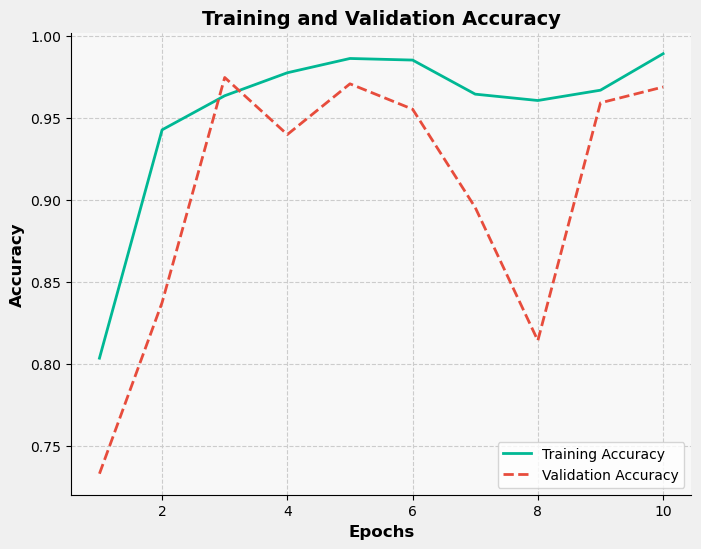

In [18]:
# Extract the accuracy and validation accuracy from the history
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

# Plot accuracy and validation accuracy
epochs = range(1, len(accuracy) + 1)

# Set custom color palette
color_palette = ['#00b894', '#e74c3c']

# Customize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed
fig.set_facecolor('#f0f0f0')  # Set the background color of the figure
ax.set_facecolor('#ffffff')  # Set the background color of the plot area
ax.grid(color='#cccccc', linestyle='--')  # Set grid lines color and style

# Plot accuracy and validation accuracy with custom styles
ax.plot(epochs, accuracy, color_palette[0], label='Training Accuracy', linewidth=2)
ax.plot(epochs, val_accuracy, color_palette[1], label='Validation Accuracy', linewidth=2, linestyle='--')

# Customize labels and title
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')

# Customize legend
ax.legend(loc='lower right', fontsize=10)

# Add a subtle background pattern
ax.set_facecolor('#f8f8f8')
ax.set_alpha(0.9)
ax.set_zorder(0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

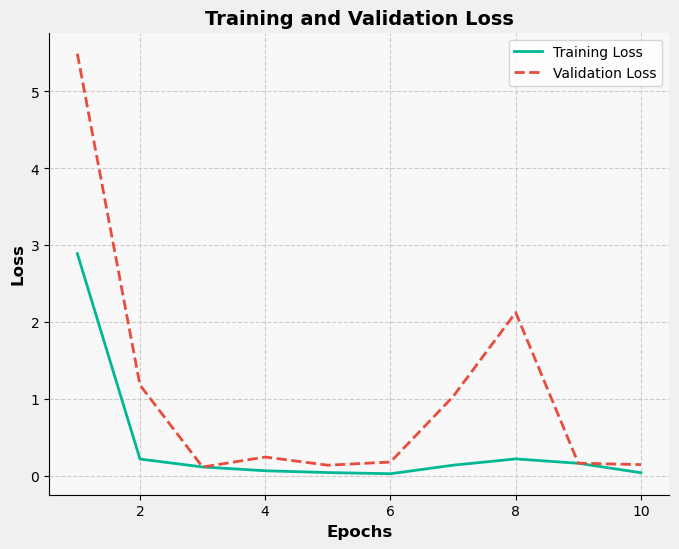

In [19]:
# Extract the loss and validation loss from the history
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plot loss and validation loss
epochs = range(1, len(loss) + 1)

# Set custom color palette
color_palette = ['#00b894', '#e74c3c']

# Customize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed
fig.set_facecolor('#f0f0f0')  # Set the background color of the figure
ax.set_facecolor('#ffffff')  # Set the background color of the plot area
ax.grid(color='#cccccc', linestyle='--')  # Set grid lines color and style

# Plot loss and validation loss with custom styles
ax.plot(epochs, loss, color_palette[0], label='Training Loss', linewidth=2)
ax.plot(epochs, val_loss, color_palette[1], label='Validation Loss', linewidth=2, linestyle='--')

# Customize labels and title
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')

# Customize legend
ax.legend(loc='upper right', fontsize=10)

# Add a subtle background pattern
ax.set_facecolor('#f8f8f8')
ax.set_alpha(0.9)
ax.set_zorder(0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

17/17 [==============================] - 1s 57ms/step


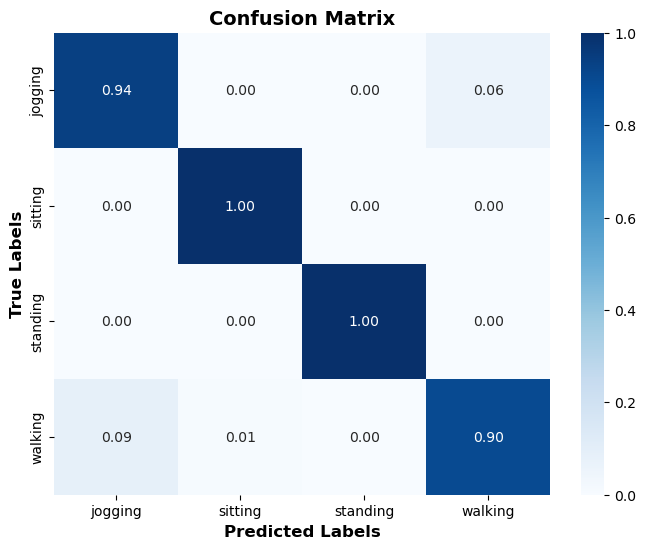

In [21]:
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)


class_names = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']
# Create confusion matrix
cm = confusion_matrix(val_labels, predicted_labels)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the heatmap colors
cmap = 'Blues'  # Change the color palette here

# Plot the heatmap
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=ax)

# Customize labels and title
ax.set_xlabel('Predicted Labels', fontsize=12, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.show()



In [24]:
report = classification_report(val_labels, predicted_labels, target_names=class_names, output_dict=True)

# Create a pretty table
table = PrettyTable()
table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Add rows to the table
for class_name, scores in report.items():
    if class_name in class_names:
        precision = scores['precision']
        recall = scores['recall']
        f1_score = scores['f1-score']
        support = scores['support']
        table.add_row([class_name, precision, recall, f1_score, support])

# Set alignment and format for numeric columns
table.align['Class'] = 'l'
table.align['Precision'] = 'f'
table.align['Recall'] = 'f'
table.align['F1-Score'] = 'f'
table.align['Support'] = 'c'

# Print the styled classification report
print(table)

+----------+--------------------+--------------------+--------------------+---------+
| Class    |     Precision      |       Recall       |      F1-Score      | Support |
+----------+--------------------+--------------------+--------------------+---------+
| jogging  | 0.9304347826086956 | 0.9385964912280702 | 0.9344978165938864 |   114   |
| sitting  | 0.9946236559139785 |        1.0         | 0.9973045822102425 |   185   |
| standing |        1.0         |        1.0         |        1.0         |   126   |
| walking  | 0.9222222222222223 | 0.9021739130434783 | 0.9120879120879122 |    92   |
+----------+--------------------+--------------------+--------------------+---------+
